In [41]:
import numpy as np
from skimage.feature import peak_local_max
from skimage.exposure import rescale_intensity
import fitstools
from matplotlib.colors import LinearSegmentedColormap
import balltracking.mballtrack as mblt
import matplotlib
import matplotlib.pyplot as plt

In [39]:
def make_data_borders_rgb(data, borders, in_range):

    bkg_gray = rescale_intensity(np.tile(data[..., np.newaxis], (1, 1, 3)), in_range=in_range,
                                 out_range=np.uint8).astype(np.uint8)

    borders_rgb = bkg_gray.copy()
    # Color positive borders as red
    borders_rgb[borders == 1, 0] = 255
    borders_rgb[borders == 1, 1] = 0
    borders_rgb[borders == 1, 2] = 0
    # Color negative borders as cyan (accounting for color blindness)
    borders_rgb[borders == -1, 0] = 175
    borders_rgb[borders == -1, 1] = 238
    borders_rgb[borders == -1, 2] = 238

    return borders_rgb

In [18]:
datafile = '/Users/rattie/Data/SDO/HMI/EARs/AR12673_2017_09_01/mtrack_20170901_000000_TAI20170905_235959_LambertCylindrical_magnetogram.fits'
data = fitstools.fitsread(datafile, tslice=0)

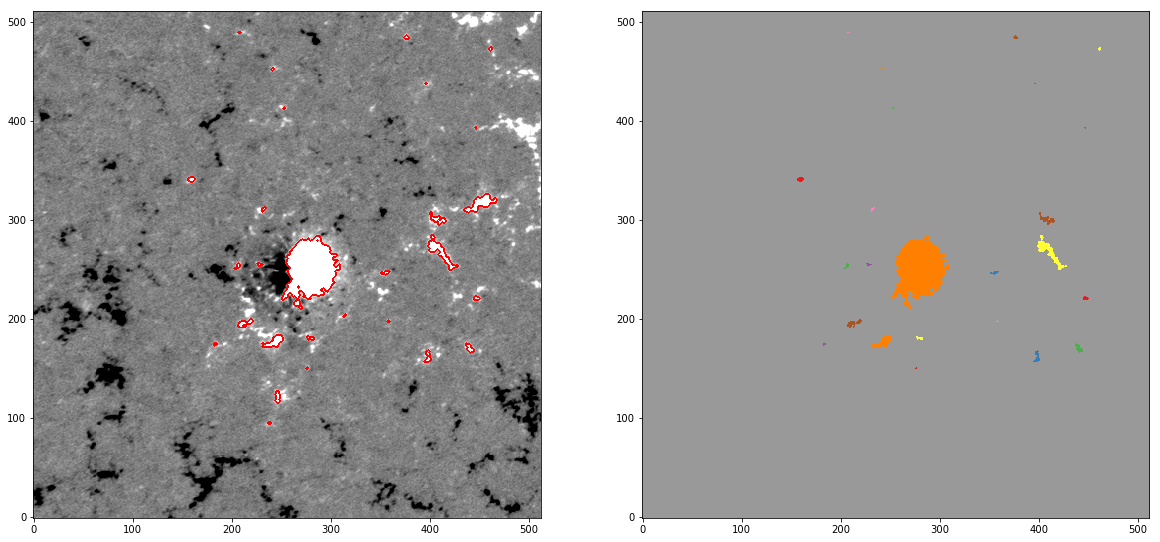

In [53]:
threshold = 100
mask_maxi = data >= threshold
local_maxi_coords = peak_local_max(data, indices=True, min_distance=20, labels=mask_maxi)

# Watershed
labels_ws, markers, borders = mblt.marker_watershed(data, local_maxi_coords[:,1], local_maxi_coords[:,0], threshold, 1)

range_minmax = (-threshold,threshold)
data_borders_rgb = make_data_borders_rgb(data, borders, range_minmax)


# colormap
colors = plt.cm.Set1_r(np.linspace(0, 1, 9))
#colors = plt.cm.Paired(np.linspace(0, 1, 12))
cmap = matplotlib.colors.ListedColormap(colors, name='mycmap', N=local_maxi_coords.shape[0])

%matplotlib inline
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
# plt.imshow(borders.astype(np.uint8), vmin=0, vmax=1, origin='lower', cmap='gray')
plt.imshow(data_borders_rgb, origin='lower')
plt.subplot(1,2,2)
plt.imshow(labels_ws, cmap=cmap, origin='lower')